In [24]:
import pandas as pd
import matplotlib.pyplot as plt
test = pd.read_csv(r'D:\2024\공부\AI아이펠\공부\DATA\240130_바이크데이터\bike-sharing-demand\test.csv')

train = pd.read_csv(r'D:\2024\공부\AI아이펠\공부\DATA\240130_바이크데이터\bike-sharing-demand\train.csv',
                        parse_dates=["datetime"])
#parse_dates로 불러오면, datetime 형식으로 불러오게됨


#문제 정리 

바이크 쉐어링 데이터를 예측하는 문제
도시에 키오스크 대여한 기록들이 train 데이터 셋에 있음
train 데이터 바탕으로 test 데이터 예측하는 문제

지도 학습과 
회귀에 해당하는 문제.

In [25]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [26]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [27]:
train.shape

(10886, 12)

In [28]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [29]:
train.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

In [30]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [31]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [32]:
train.temp.describe()

count    10886.00000
mean        20.23086
std          7.79159
min          0.82000
25%         13.94000
50%         20.50000
75%         26.24000
max         41.00000
Name: temp, dtype: float64

In [33]:
train.head(20)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14


In [34]:
train.tail(20)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10866,2012-12-19 04:00:00,4,0,1,1,9.84,12.120,75,8.9981,1,6,7
10867,2012-12-19 05:00:00,4,0,1,1,10.66,14.395,75,6.0032,2,29,31
10868,2012-12-19 06:00:00,4,0,1,1,9.84,12.880,75,6.0032,3,109,112
10869,2012-12-19 07:00:00,4,0,1,1,10.66,13.635,75,8.9981,3,360,363
10870,2012-12-19 08:00:00,4,0,1,1,9.84,12.880,87,7.0015,13,665,678
10871,2012-12-19 09:00:00,4,0,1,1,11.48,14.395,75,7.0015,8,309,317
10872,2012-12-19 10:00:00,4,0,1,1,13.12,16.665,70,7.0015,17,147,164
10873,2012-12-19 11:00:00,4,0,1,1,16.40,20.455,54,15.0013,31,169,200
10874,2012-12-19 12:00:00,4,0,1,1,16.40,20.455,54,19.0012,33,203,236
10875,2012-12-19 13:00:00,4,0,1,1,17.22,21.210,50,12.9980,30,183,213


windspeed에 '0'으로 되어있는 것 
-> 결측치를 이렇게 넣은 것 아닐까? 라는 예측도 둬보기, 

In [35]:
train.temp.describe()

count    10886.00000
mean        20.23086
std          7.79159
min          0.82000
25%         13.94000
50%         20.50000
75%         26.24000
max         41.00000
Name: temp, dtype: float64

In [36]:
train.isnull().sum()
#null 값 확인 

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

<AxesSubplot:>

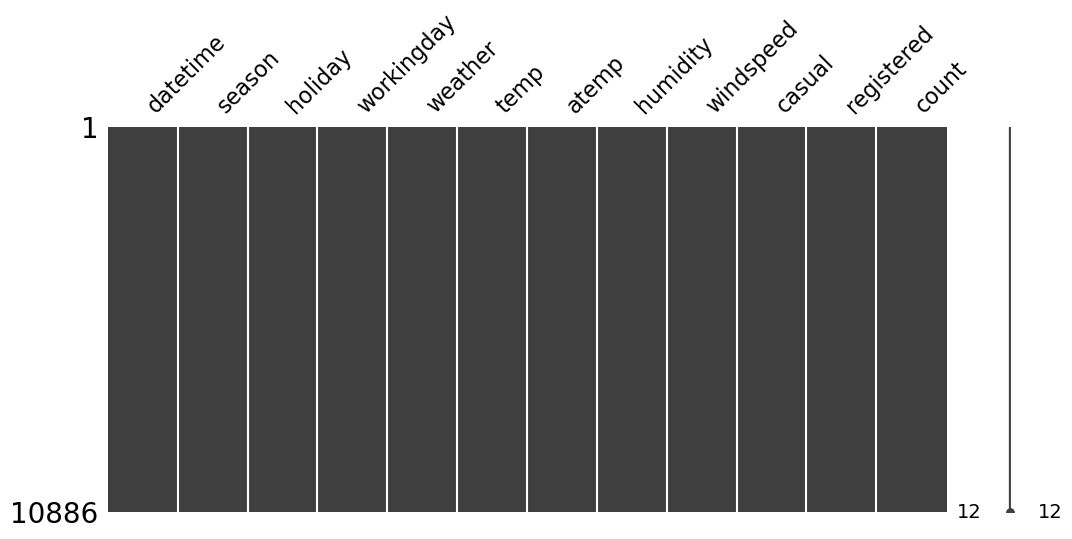

In [37]:
#null 값인 데이터가 있는지 시각화 
import missingno as msno
msno.matrix(train, figsize=(12,5))

In [38]:
#시간을 다시 나눠서 데이터 프레임에 나눌거라고함
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


"2011-01-01 00:00:00" 형식으로 되어있는 것을 
년, 월, 날짜, 시간, 분, 초로 나누기 

In [39]:
train["year"] = train["datetime"].dt.year
train["month"] = train["datetime"].dt.month
train["day"] = train["datetime"].dt.day
train["hour"] = train["datetime"].dt.hour
train["minute"] = train["datetime"].dt.minute
train["second"] = train["datetime"].dt.second
train.shape

(10886, 18)

In [40]:
#시간 데이터를 쪼개서 담아서 12개에서 18개로 늘어난 것을 볼 수 있음

In [41]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


In [42]:
#이상치 탐지

OC_registered = train['registered']

In [43]:
OC_registered.describe()

count    10886.000000
mean       155.552177
std        151.039033
min          0.000000
25%         36.000000
50%        118.000000
75%        222.000000
max        886.000000
Name: registered, dtype: float64

In [44]:
#registered - number of registered user rentals initiated 

In [45]:
#count - number of total rentals

In [46]:
OC_count = train['count']

In [47]:
OC_count.describe()

count    10886.000000
mean       191.574132
std        181.144454
min          1.000000
25%         42.000000
50%        145.000000
75%        284.000000
max        977.000000
Name: count, dtype: float64

In [48]:
OC_registered

0         13
1         32
2         27
3         10
4          1
        ... 
10881    329
10882    231
10883    164
10884    117
10885     84
Name: registered, Length: 10886, dtype: int64

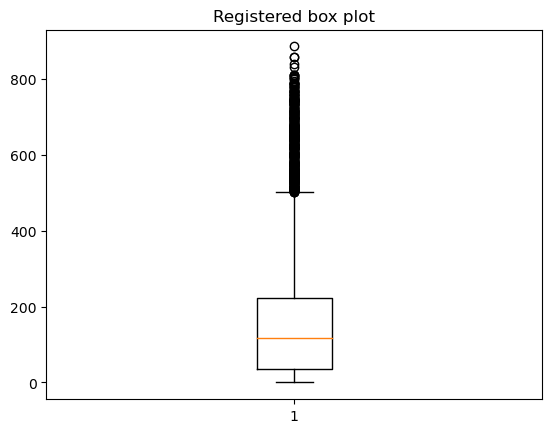

In [49]:

plt.boxplot(train['registered'], whis=1.5)
plt.title('Registered box plot')
plt.show()

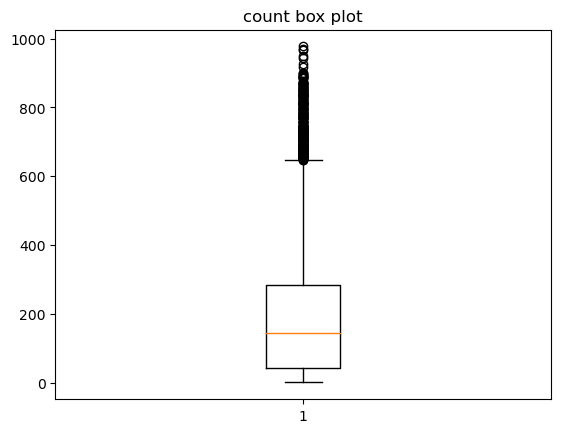

In [50]:
plt.boxplot(train['count'], whis=1.5)
plt.title('count box plot')
plt.show()

IQR에서 whis=1.5로 설정했을 때, 이상치가 저렇게 많이 몰려있는 것일 보아 이 지표는 이상치로 볼 수 없다.

[Text(0.5, 0, 'hour'), Text(0.5, 1.0, 'counts per hour')]

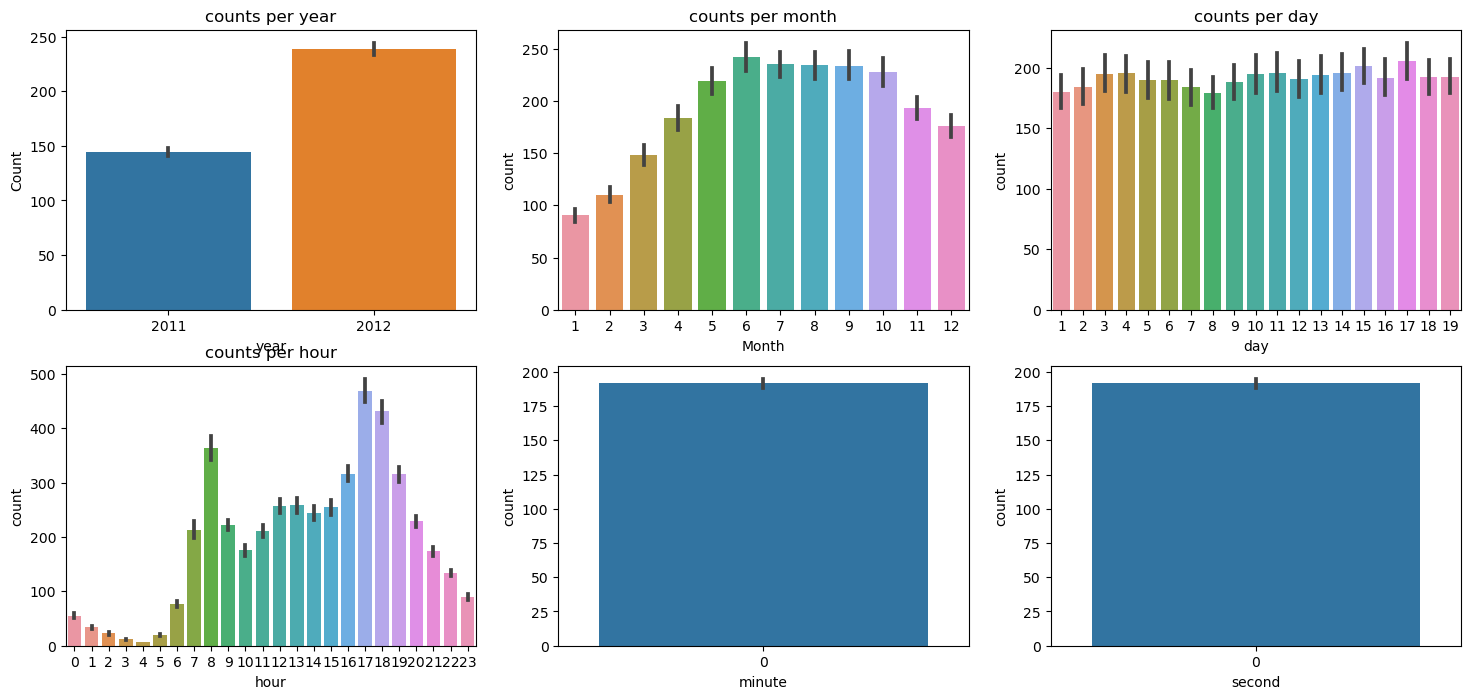

In [51]:
#대여량이 얼마나 되는지 시각화해서 보기 
import seaborn as sns

figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(18,8)

sns.barplot(data=train, x="year", y="count", ax=ax1)
sns.barplot(data=train, x="month", y="count", ax=ax2)
sns.barplot(data=train, x="day", y="count", ax=ax3)
sns.barplot(data=train, x="hour", y="count", ax=ax4)
sns.barplot(data=train, x="minute", y="count", ax=ax5)
sns.barplot(data=train, x='second', y='count', ax=ax6)

ax1.set(ylabel='Count', title="counts per year")
ax2.set(xlabel='Month', title="counts per month")
ax3.set(xlabel="day", title="counts per day")
ax4.set(xlabel="hour", title="counts per hour")

In [64]:
"""

-연도별 대여량은 2011 < 2012
-1월에 가장 적음 여름~가을에 많음 #일별은 별로 차이 없는 것 같음. 
-출/퇴근 시간에 이용률이 젤 많음. 
-일별 대여량은 1일부터 19일 까지만 있고, 나머지 데이터들은 test.csv에 20일부터 마지막 날까지있음
-그러니 일별 데이터를 피쳐로 사용할 수는 없다.

-분 초는 모두 0이기에 딱히 쓸수 있는 데이터가 아님
"""

'\n\n-연도별 대여량은 2011 < 2012\n-1월에 가장 적음 여름~가을에 많음 #일별은 별로 차이 없는 것 같음. \n-출/퇴근 시간에 이용률이 젤 많음. \n-일별 대여량은 1일부터 19일 까지만 있고, 나머지 데이터들은 test.csv에 20일부터 마지막 날까지있음\n-그러니 일별 데이터를 피쳐로 사용할 수는 없다.\n\n-분 초는 모두 0이기에 딱히 쓸수 있는 데이터가 아님\n'

In [53]:
train.head(1)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0


In [54]:
# orient="v": 박스 플롯이 세로(수직) 방향으로 그려집니다.

# ax=axes[0][0]: 그림(figure)에 서브플롯(subplot)을 설정합니다. 
#     axes[0][0]는 그림의 첫 번째 행, 첫 번째 열에 해당하는 서브플롯을 의미합니다.

<AxesSubplot:xlabel='workingday', ylabel='count'>

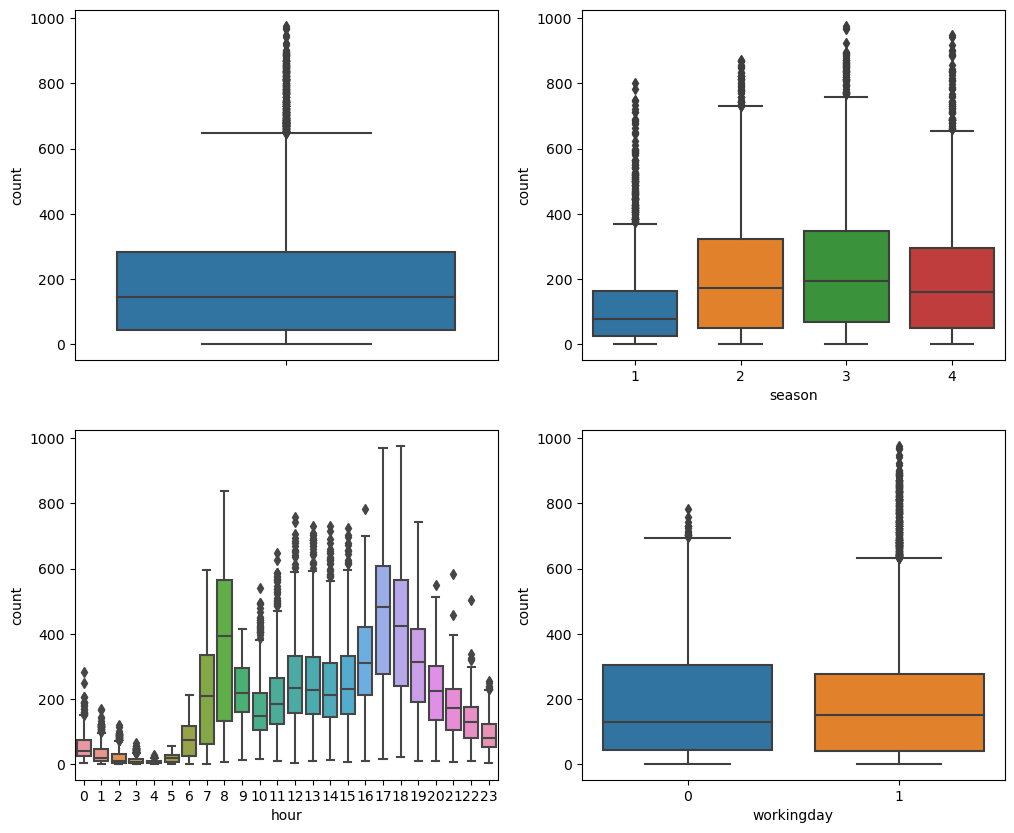

In [55]:
#이번에는 박스 플롯으로 그래프를 그려보기
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(12, 10)

sns.boxplot(data=train, y="count", orient="v", ax=axes[0][0])
sns.boxplot(data=train, y="count", x="season", orient="v", ax=axes[0][1])
sns.boxplot(data=train, y="count", x="hour", ax=axes[1][0])
sns.boxplot(data=train, y="count", x="workingday",ax=axes[1][1])



In [56]:
#workingday 여부에 따라서 그렇게 크게 변화하지 않음 0일때 더 많음(workingday가 아닐때)
# 가을에 빌리는게 많구나


In [57]:
train["dayofweek"] = train["datetime"].dt.dayofweek
train.shape
#새 변수 생성 

(10886, 19)

In [58]:
train["dayofweek"].value_counts()

5    1584
6    1579
3    1553
0    1551
2    1551
1    1539
4    1529
Name: dayofweek, dtype: int64

In [59]:
#월화수목금토일~ 
#dt.dayofweek는 요일을 나타내는 값으로 0은 월요일을, 6은 일요일을 나타냅니다.
#일반적인 관례에 따라 0이 월요일이고, 1이 화요일, ..., 6이 일요일입니다

<AxesSubplot:xlabel='hour', ylabel='count'>

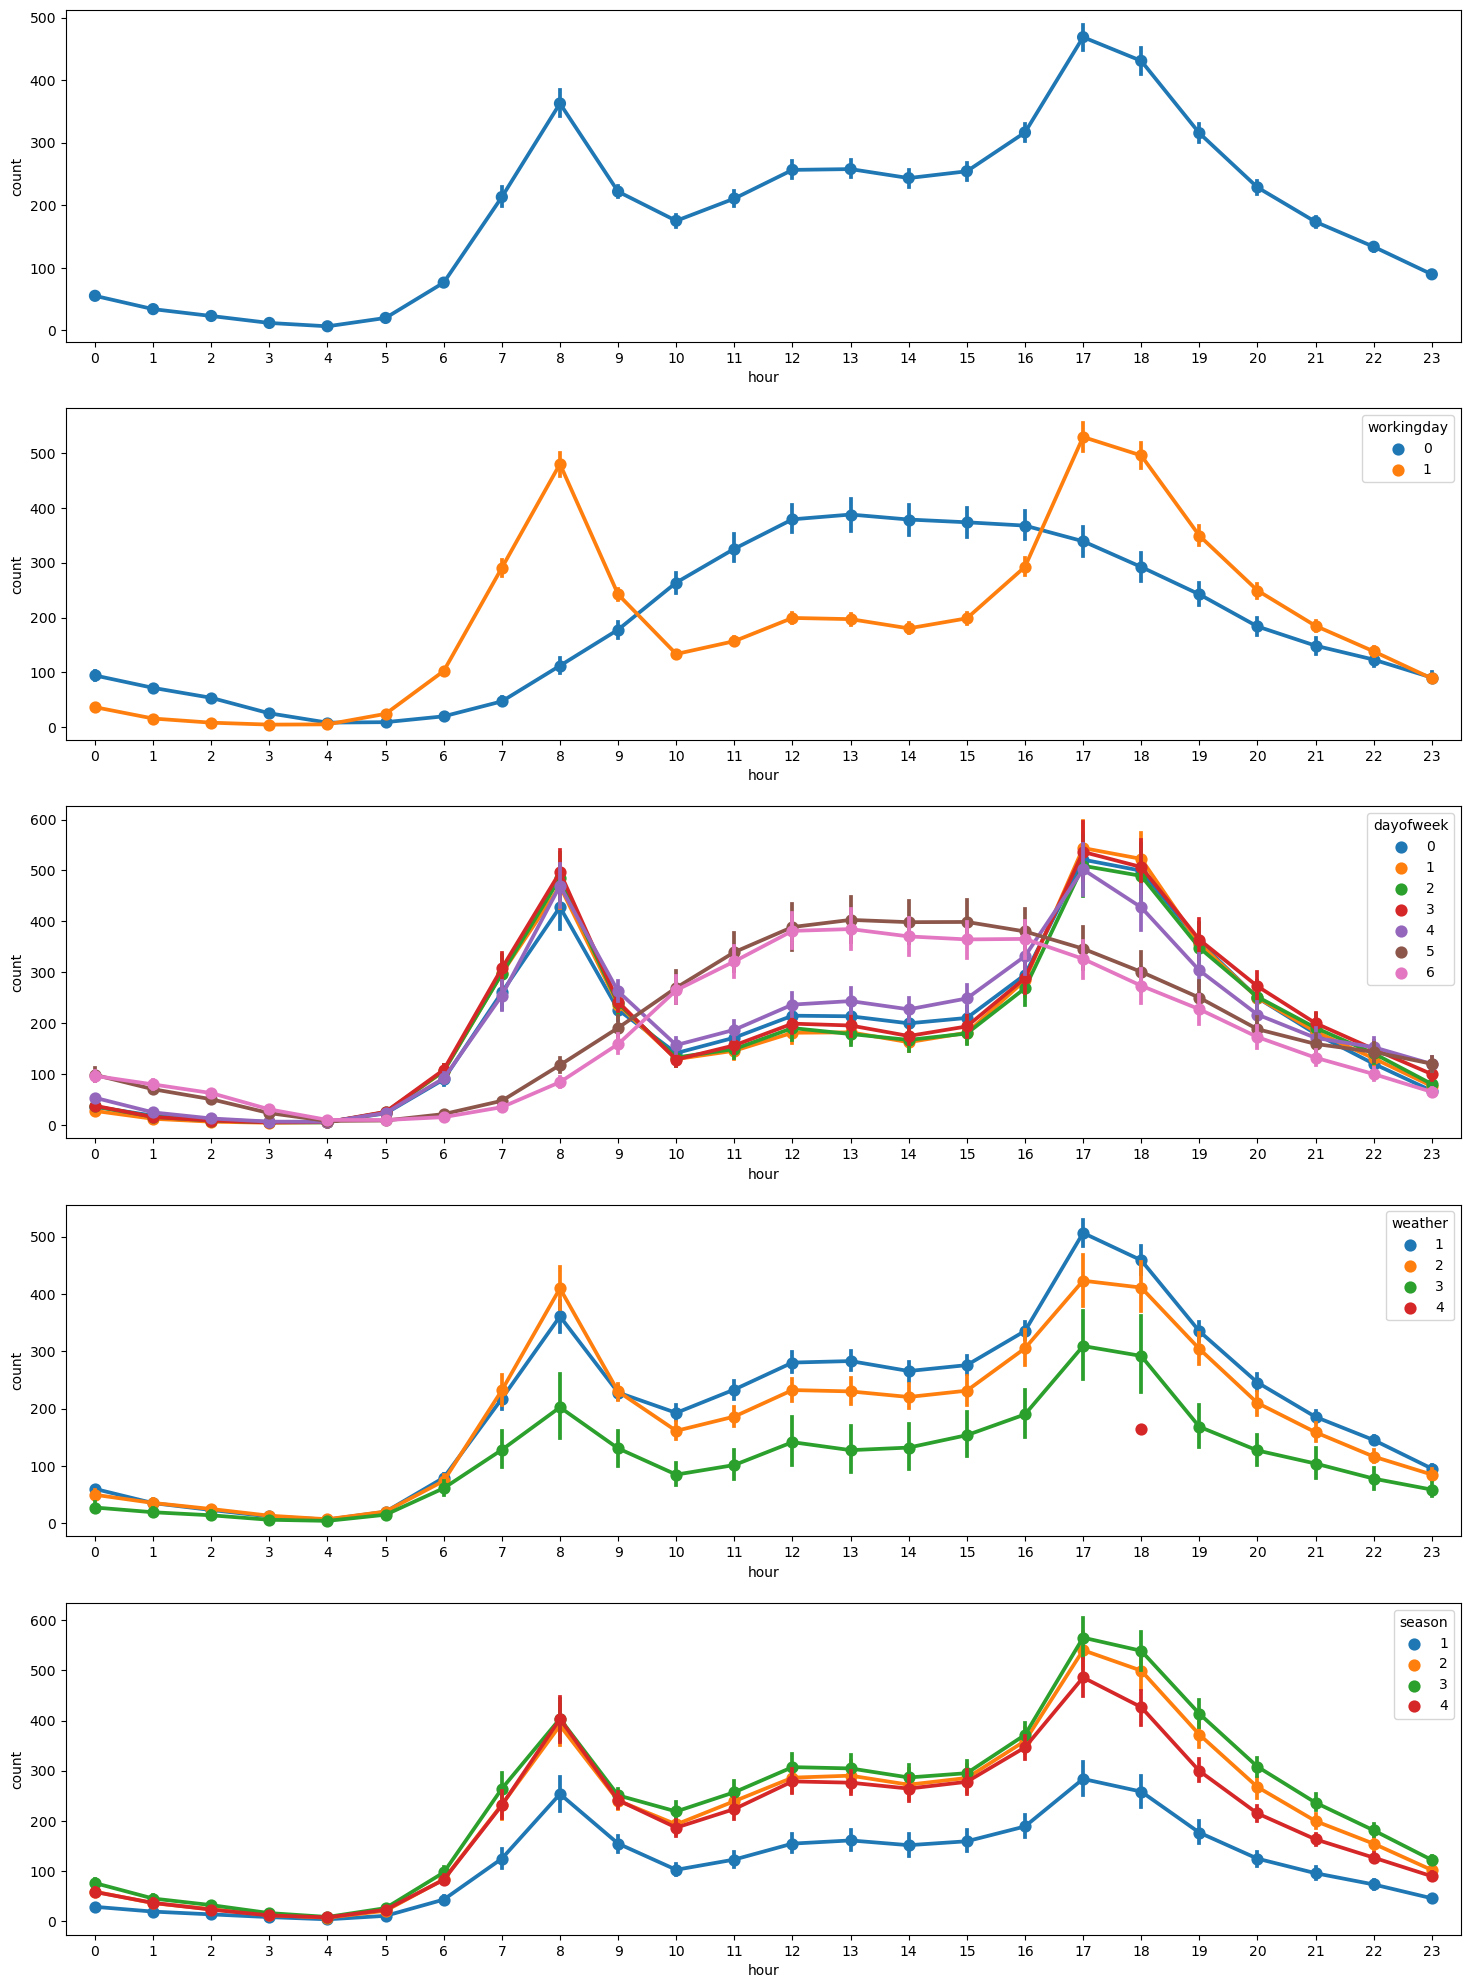

In [60]:
#dayofweek 항목도 그래프에 추가해서 보기
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=5)
fig.set_size_inches(18,25)

sns.pointplot(data=train, x="hour", y="count", ax=ax1)

sns.pointplot(data=train, x="hour", y="count", hue="workingday", ax=ax2)
sns.pointplot(data=train, x="hour", y="count", hue="dayofweek", ax=ax3)
sns.pointplot(data=train, x="hour", y="count", hue="weather", ax=ax4)
sns.pointplot(data=train, x="hour", y="count", hue="season", ax=ax5)

In [61]:
import numpy as np

#온도, 습도 등 바탕으로 어떤 관계가 있는지 확인
corrMatt = train[["temp", "atemp", "casual", "registered", "humidity", "windspeed", "count"]]
corrMatt = corrMatt.corr()

print(corrMatt)

mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False

                temp     atemp    casual  registered  humidity  windspeed  \
temp        1.000000  0.984948  0.467097    0.318571 -0.064949  -0.017852   
atemp       0.984948  1.000000  0.462067    0.314635 -0.043536  -0.057473   
casual      0.467097  0.462067  1.000000    0.497250 -0.348187   0.092276   
registered  0.318571  0.314635  0.497250    1.000000 -0.265458   0.091052   
humidity   -0.064949 -0.043536 -0.348187   -0.265458  1.000000  -0.318607   
windspeed  -0.017852 -0.057473  0.092276    0.091052 -0.318607   1.000000   
count       0.394454  0.389784  0.690414    0.970948 -0.317371   0.101369   

               count  
temp        0.394454  
atemp       0.389784  
casual      0.690414  
registered  0.970948  
humidity   -0.317371  
windspeed   0.101369  
count       1.000000  


<AxesSubplot:>

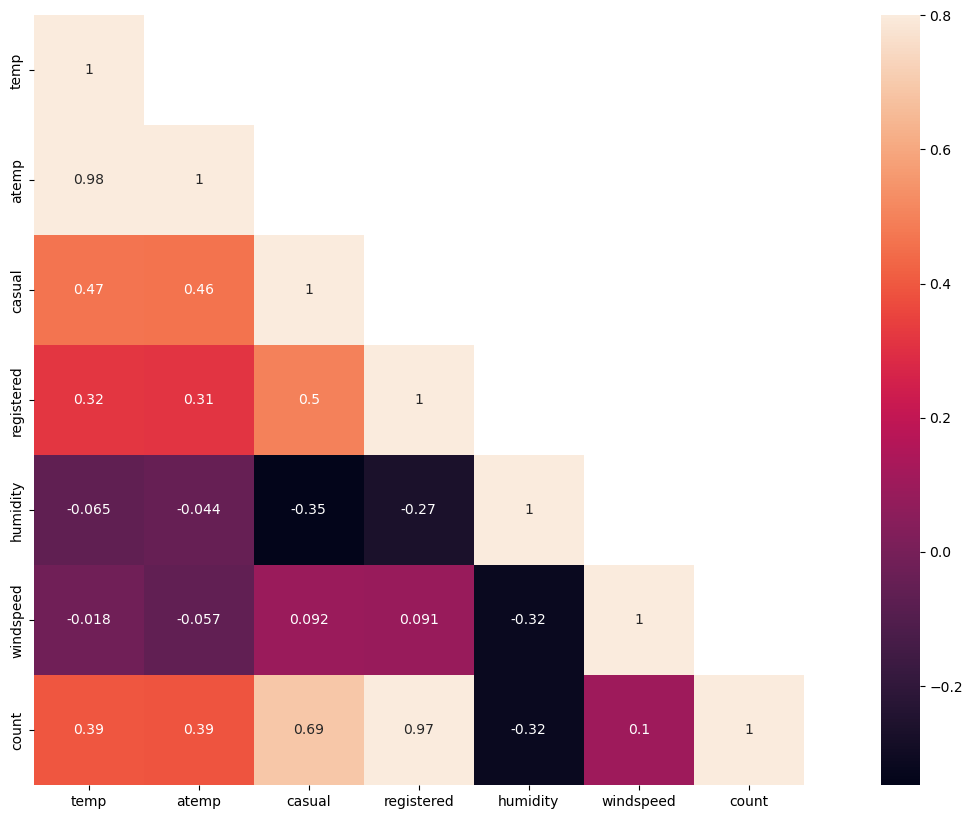

In [65]:
#어떤 연관관계가 있는지, 히트맵으로 시각화해본다.

fig, ax = plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrMatt, mask=mask, vmax=.8, square=True, annot=True)

1. 온도(temp) 변수와 풍속(windspeed), 습도(humidity)가 -0.018과 -0.065로
나오는 것을 보면 상관관계가 거의 없다.

2.대여량(count)와 연관관계가 높은 것은 등록된 사용자 (registered)이다.

3. 등록되지 않은 사용자(casual)은 풍속(windspeed)와 상관관계가 높다. 
but. test 데이터에는 없어서 feature로 사용이 어렵다.

4.온도(temp)와 체감온도(atemp)는 0.98로 높지만, 해당 결과는 당연한 관계기 때문에 feature 로 사용하기 어렵다.


<AxesSubplot:xlabel='humidity', ylabel='count'>

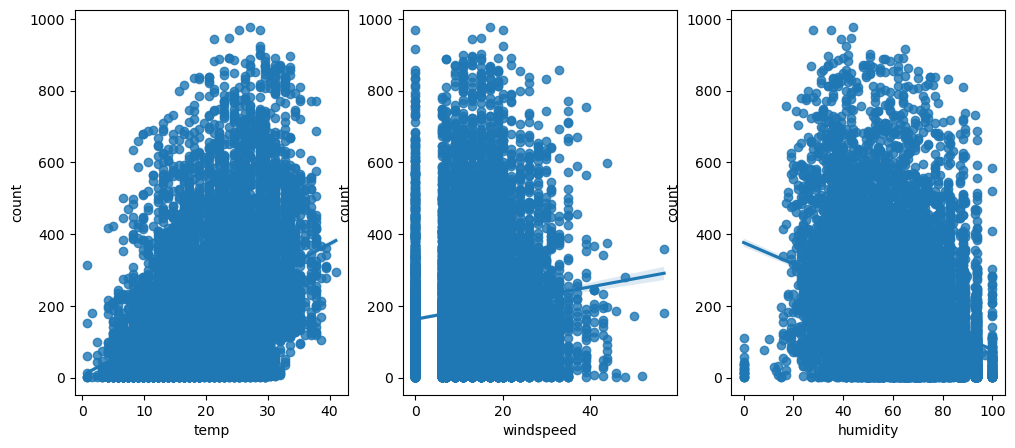

In [66]:
#온도, 풍속, 습도에 대해서 산점도를 그리기 

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3)
fig.set_size_inches(12, 5)
sns.regplot(x="temp" ,y="count", data=train, ax=ax1)
sns.regplot(x="windspeed", y="count", data=train, ax=ax2)
sns.regplot(x="humidity", y="count", data=train, ax=ax3)

In [67]:
#풍속의 경우 0에 데이터가 몰려있습니다. 이 부분은 조정이 필요해보입니다.

In [72]:
def concatenate_year_month(datetime):
    return "{0}-{1}".format(datetime.year, datetime.month)

train["year_month"] = train["datetime"].apply(concatenate_year_month)

print(train.shape)
train[["datetime","year_month"]].head()

(10886, 20)


,datetime,year_month
0,2011-01-01 00:00:00,2011-1
1,2011-01-01 01:00:00,2011-1
2,2011-01-01 02:00:00,2011-1
3,2011-01-01 03:00:00,2011-1
4,2011-01-01 04:00:00,2011-1


1. concatenate_year_month 함수는 하나의 매개변수로 받은 datetime 객체의 연도(year)와 월(month)을 문자열로 결합하여 반환합니다.

2. train 데이터프레임에 "datetime"이라는 열이 존재한다고 가정합니다.

3. train["datetime"].apply(concatenate_year_month) 코드는 "datetime" 열의 각 행에 대해 concatenate_year_month 함수를 적용하고, 그 결과를 "year_month" 열에 저장합니다.

4. 마지막으로, 코드는 데이터프레임의 크기를 출력하고, "datetime" 및 "year_month" 열의 처음 몇 행을 출력합니다.

즉, 이 코드는 "datetime" 열의 연도와 월 정보를 가지고 새로운 "year_month" 열을 만들어 데이터프레임에 추가하는 작업을 수행합니다.

<AxesSubplot:xlabel='year_month', ylabel='count'>

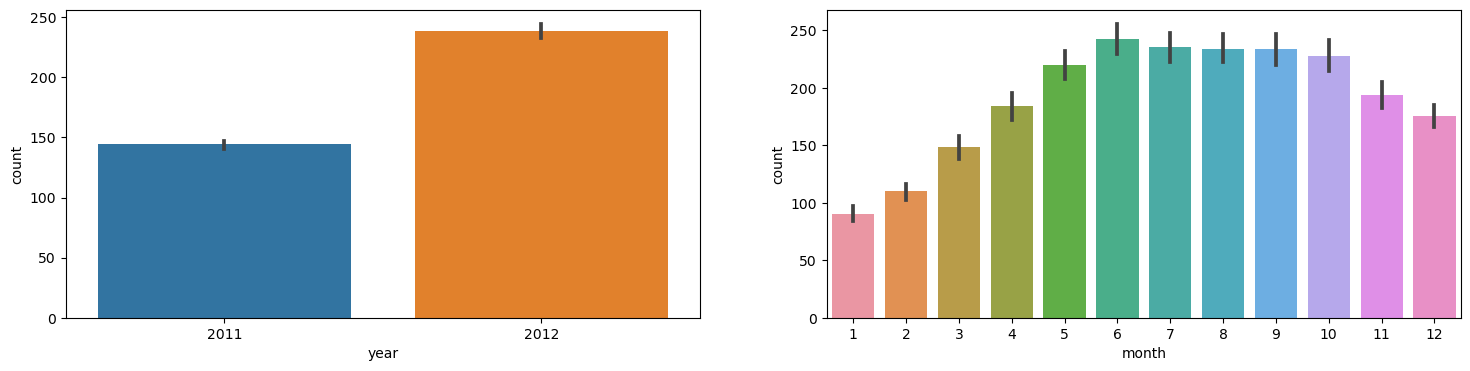

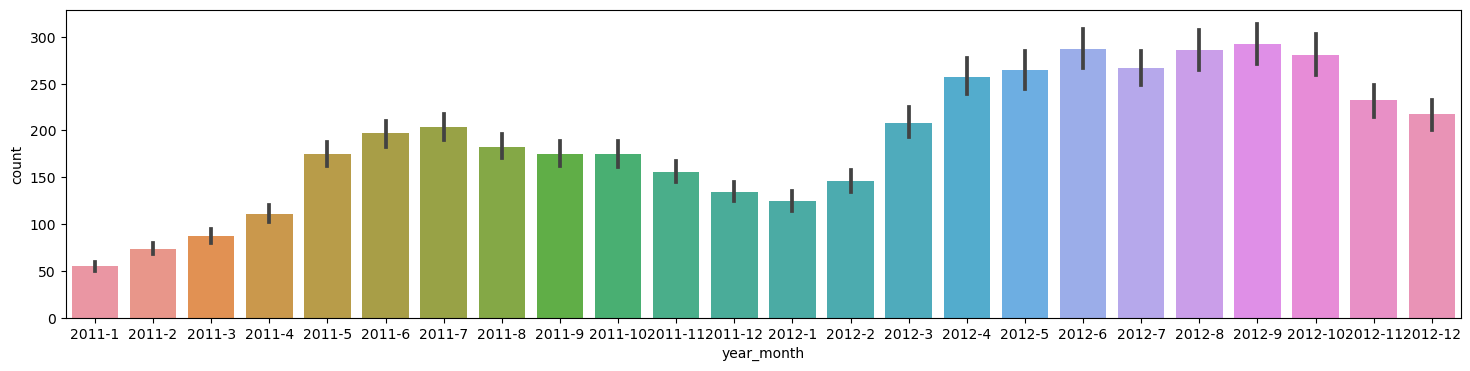

In [74]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(18, 4)

sns.barplot(data=train, x="year", y="count", ax=ax1)
sns.barplot(data=train, x="month", y="count", ax=ax2)

fig, ax3 = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(18,4)

sns.barplot(data=train, x="year_month", y="count", ax=ax3) 


전체적으로 대여량이 점점 늘고 있습니다. 5~10월 사이가 가장 많은 편으로 보입니다.

In [78]:
#이상치(Outliers) 데이터를 제거합니다.

TrainWithoutOutliers = train[np.abs(train["count"] - train["count"].mean()) <= (3*train["count"])]

print(train.shape)
print(TrainWithoutOutliers.shape)

(10886, 20)
(8001, 20)


이 코드는 주어진 데이터프레임 train에서 "count" 열 값의 표준편차의 3배 이내에 있는 행들만 선택하여 새로운 데이터프레임인 TrainWithoutOutliers를 생성하는 작업을 수행합니다.

보다 자세한 해석은 다음과 같습니다:

train["count"].mean(): "count" 열의 평균값을 계산합니다.

np.abs(train["count"] - train["count"].mean()): "count" 열의 각 행에서 평균값을 뺀 절대값을 계산합니다.

(3 * train["count"]): "count" 열의 값에 3을 곱한 값을 계산합니다.

np.abs(train["count"] - train["count"].mean()) <= (3 * train["count"]): 각 행에 대해 위에서 계산한 두 값을 비교하여, 이 조건을 만족하는 행들을 선택합니다.

TrainWithoutOutliers = train[...]: 위에서 선택한 행들로 새로운 데이터프레임 TrainWithoutOutliers를 생성합니다.

즉, 이 코드는 "count" 열 값에서 평균을 뺀 값의 절대값이 표준편차의 3배 이내에 있는 행들만을 선택하여 이를 포함하는 새로운 데이터프레임을 만들어냅니다. 이는 주로 이상치(outliers)를 제거하거나 처리하기 위한 방법 중 하나입니다.

C:\Users\pig30n77\ANACONDA\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\pig30n77\ANACONDA\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


((array([-3.75512118, -3.52683847, -3.40136165, ...,  3.40136165,
          3.52683847,  3.75512118]),
  array([3.8918203 , 3.8918203 , 3.8918203 , ..., 6.87626461, 6.87832647,
         6.88550967])),
 (0.6811413933668112, 5.319241302387579, 0.9926479860119488))

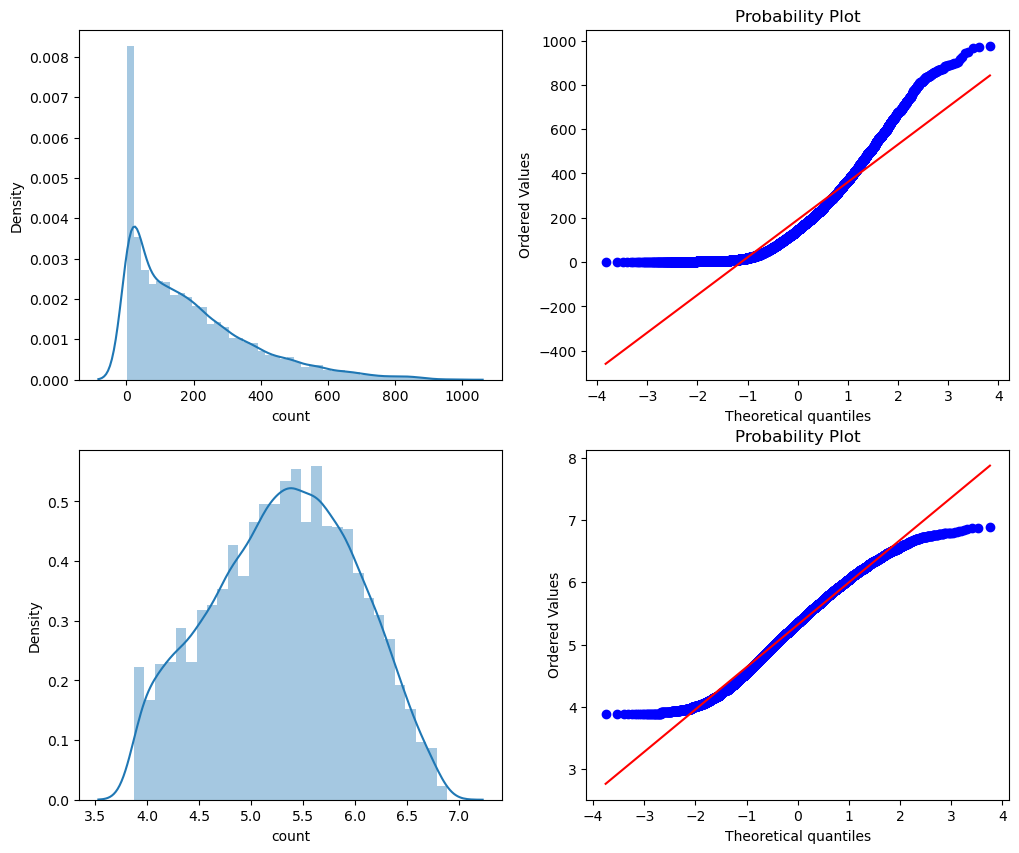

In [87]:
# count값의 데이터 분포도를 파악합니다.
import scipy.stats as stats

figure, axes = plt.subplots(ncols=2, nrows=2)
figure.set_size_inches(12, 10) 

sns.distplot(train["count"], ax=axes[0][0])
stats.probplot(train["count"], dist='norm', fit=True, plot=axes[0][1])
#sns.histplot(np.log(TrainWithoutOutliers["count"]), ax=axes[1][0])
sns.distplot(np.log(TrainWithoutOutliers["count"]), ax=axes[1][0])
stats.probplot(np.log1p(TrainWithoutOutliers["count"]), dist='norm', fit=True, plot=axes[1][1])

참고자료 - https://www.youtube.com/watch?v=Q_MbN-vu_2w&t=768s (오늘코드)